# CLASSIFICATION OF TWEETS CODING APPROACH  

In [1]:
#importing the necessary libraries 
import json
import pandas as pd
import nltk
import re
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from collections import Counter
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline, make_pipeline 
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import pickle

In [2]:
pip install nltk

Note: you may need to restart the kernel to use updated packages.


In [3]:
nltk.download('all');

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to
[nltk_data]    |     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]    |   Package basqu

In [4]:
# function for importing JSON data from files
def load_json_data(filename):
    with open(filename, 'r') as file:
        data = json.load(file)
    return data
df = load_json_data('twitter.json')
df

[{'text': 'The {@Clinton LumberKings@} beat the {@Cedar Rapids Kernels@} 4-0 in Game 1 of the Western Division finals. Evan Edwards hit a 2-run HR. WP Josh Roberson: 5 IP, 3 H, 0 R, 0 BB, 10 K #MWLplayoffs #MWLscoreboard',
  'date': '2019-09-08',
  'label': 4,
  'id': 1170516324419866624,
  'label_name': 'sports_&_gaming'},
 {'text': 'I would rather hear Eli Gold announce this Auburn game than these dumbasses. {@ESPN@}',
  'date': '2019-09-08',
  'label': 4,
  'id': 1170516440690176006,
  'label_name': 'sports_&_gaming'},
 {'text': 'Someone take my phone away, I’m trying to not look at {@Chicago Blackhawks@} home game tickets in October ',
  'date': '2019-09-08',
  'label': 4,
  'id': 1170516543387709440,
  'label_name': 'sports_&_gaming'},
 {'text': 'A year ago, Louisville struggled to beat an FCS opponent, ISU.  Yes they won 31-7, but score wasn’t indicative of the game flow.  Today, they are demoralizing a better FCS opponent in EKU. {@Coach Satterfield@} thank you!! {{USERNAME}} , 

In [5]:
#loading and converting the JSON data to a Pandas DataFrame
json_data = load_json_data('twitter.json')
df = pd.DataFrame(json_data)
df

,text,date,label,id,label_name
0,The {@Clinton LumberKings@} beat the {@Cedar R...,2019-09-08,4,1170516324419866624,sports_&_gaming
1,I would rather hear Eli Gold announce this Aub...,2019-09-08,4,1170516440690176006,sports_&_gaming
2,"Someone take my phone away, I’m trying to not ...",2019-09-08,4,1170516543387709440,sports_&_gaming
3,"A year ago, Louisville struggled to beat an FC...",2019-09-08,4,1170516620466429953,sports_&_gaming
4,Anyone know why the #Dodgers #Orioles game nex...,2019-09-08,4,1170516711411310592,sports_&_gaming
...,...,...,...,...,...
6438,Praying for {{USERNAME}} family friends riding...,2021-08-29,3,1431979856120762370,daily_life
6439,"Etsy: {{USERNAME}} Hi there, I m sorry to hear...",2021-08-29,1,1432008666018942977,business_&_entrepreneurs
6440,Imagine how hard it is to be a Teume. Everyone...,2021-08-29,2,1432008666803097606,pop_culture
6441,Ride With Me - Mental Health Awareness Charity...,2021-08-29,2,1432069101753491456,pop_culture


### Exploratory Data Analysis (EDA) and Data Preprocessing

In [6]:
# Verifying  length of the JSON dataset
length = len(df)
print("Length of the JSON dataset:", length)

Length of the JSON dataset: 6443


In [7]:
df.isnull().sum() #Finding missing values

text          0
date          0
label         0
id            0
label_name    0
dtype: int64

In [8]:
df[df.duplicated()] #checking for duplicated rows

,text,date,label,id,label_name


In [9]:
df.columns #checking column names in the dataset

Index(['text', 'date', 'label', 'id', 'label_name'], dtype='object')

In [10]:
df.shape #examining the dataset's shape

(6443, 5)

In [11]:
# Changing the case of the 'text' column to lowercase
df['text'] = df['text'].apply(lambda x: x.lower())
df

,text,date,label,id,label_name
0,the {@clinton lumberkings@} beat the {@cedar r...,2019-09-08,4,1170516324419866624,sports_&_gaming
1,i would rather hear eli gold announce this aub...,2019-09-08,4,1170516440690176006,sports_&_gaming
2,"someone take my phone away, i’m trying to not ...",2019-09-08,4,1170516543387709440,sports_&_gaming
3,"a year ago, louisville struggled to beat an fc...",2019-09-08,4,1170516620466429953,sports_&_gaming
4,anyone know why the #dodgers #orioles game nex...,2019-09-08,4,1170516711411310592,sports_&_gaming
...,...,...,...,...,...
6438,praying for {{username}} family friends riding...,2021-08-29,3,1431979856120762370,daily_life
6439,"etsy: {{username}} hi there, i m sorry to hear...",2021-08-29,1,1432008666018942977,business_&_entrepreneurs
6440,imagine how hard it is to be a teume. everyone...,2021-08-29,2,1432008666803097606,pop_culture
6441,ride with me - mental health awareness charity...,2021-08-29,2,1432069101753491456,pop_culture


In [12]:
# remvoving special characters, numbers, and punctuation marks from the 'text' column
df['text'] = df['text'].apply(lambda x: re.sub(r'[^a-z]+', ' ', x.lower()))
df

,text,date,label,id,label_name
0,the clinton lumberkings beat the cedar rapids ...,2019-09-08,4,1170516324419866624,sports_&_gaming
1,i would rather hear eli gold announce this aub...,2019-09-08,4,1170516440690176006,sports_&_gaming
2,someone take my phone away i m trying to not l...,2019-09-08,4,1170516543387709440,sports_&_gaming
3,a year ago louisville struggled to beat an fcs...,2019-09-08,4,1170516620466429953,sports_&_gaming
4,anyone know why the dodgers orioles game next ...,2019-09-08,4,1170516711411310592,sports_&_gaming
...,...,...,...,...,...
6438,praying for username family friends riding out...,2021-08-29,3,1431979856120762370,daily_life
6439,etsy username hi there i m sorry to hear that ...,2021-08-29,1,1432008666018942977,business_&_entrepreneurs
6440,imagine how hard it is to be a teume everyone ...,2021-08-29,2,1432008666803097606,pop_culture
6441,ride with me mental health awareness charity c...,2021-08-29,2,1432069101753491456,pop_culture


In [13]:
# Separating text into individual tokens within the 'text' column
df['tokenized_text'] = df['text'].apply(nltk.word_tokenize)
df

,text,date,label,id,label_name,tokenized_text
0,the clinton lumberkings beat the cedar rapids ...,2019-09-08,4,1170516324419866624,sports_&_gaming,"[the, clinton, lumberkings, beat, the, cedar, ..."
1,i would rather hear eli gold announce this aub...,2019-09-08,4,1170516440690176006,sports_&_gaming,"[i, would, rather, hear, eli, gold, announce, ..."
2,someone take my phone away i m trying to not l...,2019-09-08,4,1170516543387709440,sports_&_gaming,"[someone, take, my, phone, away, i, m, trying,..."
3,a year ago louisville struggled to beat an fcs...,2019-09-08,4,1170516620466429953,sports_&_gaming,"[a, year, ago, louisville, struggled, to, beat..."
4,anyone know why the dodgers orioles game next ...,2019-09-08,4,1170516711411310592,sports_&_gaming,"[anyone, know, why, the, dodgers, orioles, gam..."
...,...,...,...,...,...,...
6438,praying for username family friends riding out...,2021-08-29,3,1431979856120762370,daily_life,"[praying, for, username, family, friends, ridi..."
6439,etsy username hi there i m sorry to hear that ...,2021-08-29,1,1432008666018942977,business_&_entrepreneurs,"[etsy, username, hi, there, i, m, sorry, to, h..."
6440,imagine how hard it is to be a teume everyone ...,2021-08-29,2,1432008666803097606,pop_culture,"[imagine, how, hard, it, is, to, be, a, teume,..."
6441,ride with me mental health awareness charity c...,2021-08-29,2,1432069101753491456,pop_culture,"[ride, with, me, mental, health, awareness, ch..."


In [14]:
# function to eliminate stopwords
def remove_stopwords(text):
    stop_words = set(stopwords.words('english'))
    words = nltk.word_tokenize(text)
    filtered_words = [word for word in words if word.lower() not in stop_words]
    return ' '.join(filtered_words)

# Implement the function on the 'text' column
df['text_without_stopwords'] = df['text'].apply(remove_stopwords)

In [15]:
df

,text,date,label,id,label_name,tokenized_text,text_without_stopwords
0,the clinton lumberkings beat the cedar rapids ...,2019-09-08,4,1170516324419866624,sports_&_gaming,"[the, clinton, lumberkings, beat, the, cedar, ...",clinton lumberkings beat cedar rapids kernels ...
1,i would rather hear eli gold announce this aub...,2019-09-08,4,1170516440690176006,sports_&_gaming,"[i, would, rather, hear, eli, gold, announce, ...",would rather hear eli gold announce auburn gam...
2,someone take my phone away i m trying to not l...,2019-09-08,4,1170516543387709440,sports_&_gaming,"[someone, take, my, phone, away, i, m, trying,...",someone take phone away trying look chicago bl...
3,a year ago louisville struggled to beat an fcs...,2019-09-08,4,1170516620466429953,sports_&_gaming,"[a, year, ago, louisville, struggled, to, beat...",year ago louisville struggled beat fcs opponen...
4,anyone know why the dodgers orioles game next ...,2019-09-08,4,1170516711411310592,sports_&_gaming,"[anyone, know, why, the, dodgers, orioles, gam...",anyone know dodgers orioles game next thursday...
...,...,...,...,...,...,...,...
6438,praying for username family friends riding out...,2021-08-29,3,1431979856120762370,daily_life,"[praying, for, username, family, friends, ridi...",praying username family friends riding ida saf...
6439,etsy username hi there i m sorry to hear that ...,2021-08-29,1,1432008666018942977,business_&_entrepreneurs,"[etsy, username, hi, there, i, m, sorry, to, h...",etsy username hi sorry hear account closed bes...
6440,imagine how hard it is to be a teume everyone ...,2021-08-29,2,1432008666803097606,pop_culture,"[imagine, how, hard, it, is, to, be, a, teume,...",imagine hard teume everyone us look us fightin...
6441,ride with me mental health awareness charity c...,2021-08-29,2,1432069101753491456,pop_culture,"[ride, with, me, mental, health, awareness, ch...",ride mental health awareness charity cycle rid...


In [16]:
lemmatizer = WordNetLemmatizer()
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [17]:
# Defining a function to perform word lemmatization
def lemmatize_text(text):
    lemmatizer = WordNetLemmatizer()
    words = nltk.word_tokenize(text)
    lemmatized_words = [lemmatizer.lemmatize(word) for word in words]
    return ' '.join(lemmatized_words)

# Applying the lemmatization function on the 'text_without_stopwords' column.
df['lemmatized_text'] = df['text_without_stopwords'].apply(lemmatize_text)

In [18]:
df

,text,date,label,id,label_name,tokenized_text,text_without_stopwords,lemmatized_text
0,the clinton lumberkings beat the cedar rapids ...,2019-09-08,4,1170516324419866624,sports_&_gaming,"[the, clinton, lumberkings, beat, the, cedar, ...",clinton lumberkings beat cedar rapids kernels ...,clinton lumberkings beat cedar rapid kernel ga...
1,i would rather hear eli gold announce this aub...,2019-09-08,4,1170516440690176006,sports_&_gaming,"[i, would, rather, hear, eli, gold, announce, ...",would rather hear eli gold announce auburn gam...,would rather hear eli gold announce auburn gam...
2,someone take my phone away i m trying to not l...,2019-09-08,4,1170516543387709440,sports_&_gaming,"[someone, take, my, phone, away, i, m, trying,...",someone take phone away trying look chicago bl...,someone take phone away trying look chicago bl...
3,a year ago louisville struggled to beat an fcs...,2019-09-08,4,1170516620466429953,sports_&_gaming,"[a, year, ago, louisville, struggled, to, beat...",year ago louisville struggled beat fcs opponen...,year ago louisville struggled beat fcs opponen...
4,anyone know why the dodgers orioles game next ...,2019-09-08,4,1170516711411310592,sports_&_gaming,"[anyone, know, why, the, dodgers, orioles, gam...",anyone know dodgers orioles game next thursday...,anyone know dodger oriole game next thursday f...
...,...,...,...,...,...,...,...,...
6438,praying for username family friends riding out...,2021-08-29,3,1431979856120762370,daily_life,"[praying, for, username, family, friends, ridi...",praying username family friends riding ida saf...,praying username family friend riding ida safe...
6439,etsy username hi there i m sorry to hear that ...,2021-08-29,1,1432008666018942977,business_&_entrepreneurs,"[etsy, username, hi, there, i, m, sorry, to, h...",etsy username hi sorry hear account closed bes...,etsy username hi sorry hear account closed bes...
6440,imagine how hard it is to be a teume everyone ...,2021-08-29,2,1432008666803097606,pop_culture,"[imagine, how, hard, it, is, to, be, a, teume,...",imagine hard teume everyone us look us fightin...,imagine hard teume everyone u look u fighting ...
6441,ride with me mental health awareness charity c...,2021-08-29,2,1432069101753491456,pop_culture,"[ride, with, me, mental, health, awareness, ch...",ride mental health awareness charity cycle rid...,ride mental health awareness charity cycle rid...


In [19]:
# Define a function to join the words back into a single string
def join_words(text):
    words = text.split()
    joined_text = ' '.join(words)
    return joined_text

In [20]:
# Apply the function to the 'text' column
df['text'] = df['lemmatized_text'].apply(join_words)

In [21]:
df

,text,date,label,id,label_name,tokenized_text,text_without_stopwords,lemmatized_text
0,clinton lumberkings beat cedar rapid kernel ga...,2019-09-08,4,1170516324419866624,sports_&_gaming,"[the, clinton, lumberkings, beat, the, cedar, ...",clinton lumberkings beat cedar rapids kernels ...,clinton lumberkings beat cedar rapid kernel ga...
1,would rather hear eli gold announce auburn gam...,2019-09-08,4,1170516440690176006,sports_&_gaming,"[i, would, rather, hear, eli, gold, announce, ...",would rather hear eli gold announce auburn gam...,would rather hear eli gold announce auburn gam...
2,someone take phone away trying look chicago bl...,2019-09-08,4,1170516543387709440,sports_&_gaming,"[someone, take, my, phone, away, i, m, trying,...",someone take phone away trying look chicago bl...,someone take phone away trying look chicago bl...
3,year ago louisville struggled beat fcs opponen...,2019-09-08,4,1170516620466429953,sports_&_gaming,"[a, year, ago, louisville, struggled, to, beat...",year ago louisville struggled beat fcs opponen...,year ago louisville struggled beat fcs opponen...
4,anyone know dodger oriole game next thursday f...,2019-09-08,4,1170516711411310592,sports_&_gaming,"[anyone, know, why, the, dodgers, orioles, gam...",anyone know dodgers orioles game next thursday...,anyone know dodger oriole game next thursday f...
...,...,...,...,...,...,...,...,...
6438,praying username family friend riding ida safe...,2021-08-29,3,1431979856120762370,daily_life,"[praying, for, username, family, friends, ridi...",praying username family friends riding ida saf...,praying username family friend riding ida safe...
6439,etsy username hi sorry hear account closed bes...,2021-08-29,1,1432008666018942977,business_&_entrepreneurs,"[etsy, username, hi, there, i, m, sorry, to, h...",etsy username hi sorry hear account closed bes...,etsy username hi sorry hear account closed bes...
6440,imagine hard teume everyone u look u fighting ...,2021-08-29,2,1432008666803097606,pop_culture,"[imagine, how, hard, it, is, to, be, a, teume,...",imagine hard teume everyone us look us fightin...,imagine hard teume everyone u look u fighting ...
6441,ride mental health awareness charity cycle rid...,2021-08-29,2,1432069101753491456,pop_culture,"[ride, with, me, mental, health, awareness, ch...",ride mental health awareness charity cycle rid...,ride mental health awareness charity cycle rid...


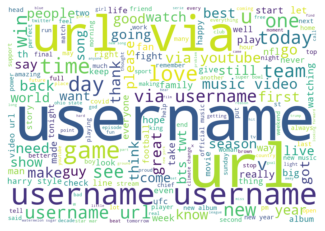

In [22]:
# Word Cloud
text_only = ' '.join(df['text'])
wordcloud = WordCloud(width=1000, height=700, background_color='white').generate(text_only)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

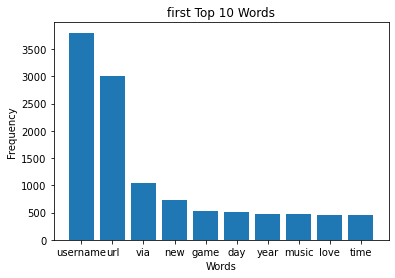

In [23]:
# checking the frequencies of first ten words 
text_only = ' '.join(df['text'])
words = word_tokenize(text_only)
word_freq = Counter(words)
top_n = 10  # defining 'top_n'
top_words = dict(word_freq.most_common(top_n))
plt.bar(top_words.keys(), top_words.values())
plt.title('first Top {} Words'.format(top_n))
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.show()

## Splitting the Dataset into Training and Testing Set

In [24]:
# Establishing and defining the training and testing data sets
X = df['text']
y = df['label']

In [25]:
# Dataset splitting into training and testing sets (80% train - 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [26]:
X_train # x training data

2596    jan man making final appearance today servant ...
2337    giving dream reality dictate let gmc napco go ...
4883    atlanta activist spent black life matter donat...
6300    saskay enters bbnaija shine ya eye st housemat...
151     cried entire first half dear evan hansen reall...
                              ...                        
3772    wonder match wrestlemania night username looki...
5191    final username username match njpwstrong anoth...
5226    ex ohio state hockey player abused richard str...
5390    cammi kol emerald last forever official music ...
860     tyson fury challenge anthony joshua prove worl...
Name: text, Length: 5154, dtype: object

In [27]:
y_train # y training data

2596    4
2337    3
4883    3
6300    2
151     2
       ..
3772    4
5191    4
5226    4
5390    2
860     4
Name: label, Length: 5154, dtype: int64

In [28]:
X_test # x testing data

4622    run micro center stock filament dprinters got ...
233       climate change hoax dr tim ball url via youtube
6003    blue back havent done shop shift week cant rem...
6126    archive many medium pundit witnessed article n...
907     someone dedicated dang mac miller username mes...
                              ...                        
2741    nowplaying channel username miccratesradio dow...
5378    come buffalo bill go th expect kicker deal win...
3658        thought holly rowe would eaten ncaa b le sigh
1186    dear doctor flux retweet spoil anyone else cou...
3685    great main event great show thank nwa thank us...
Name: text, Length: 1289, dtype: object

In [29]:
y_test # y testing data

4622    3
233     2
6003    4
6126    3
907     2
       ..
2741    2
5378    4
3658    4
1186    2
3685    2
Name: label, Length: 1289, dtype: int64

In [30]:
# sizes of training and testing data
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(5154,)
(5154,)
(1289,)
(1289,)


### Feature Extraction Using Bag Of Words

In [31]:
# Creating bag of words matrix
vectorizer = CountVectorizer()
bag_of_words = vectorizer.fit_transform(df)
print(bag_of_words.toarray())

[[0 0 0 0 0 1 0 0]
 [1 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0]
 [0 1 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0]
 [0 0 0 0 0 0 0 1]
 [0 0 0 0 0 0 1 0]
 [0 0 0 0 1 0 0 0]]


In [32]:
#converting text data into a matrix of token (word) counts while excluding english stop words using the bag of words approach 
vectorizer = CountVectorizer(stop_words='english')
X_train_counts = vectorizer.fit_transform(X_train)
X_test_counts = vectorizer.transform(X_test)      

In [33]:
X_train_counts.shape

(5154, 16392)

In [34]:
X_test_counts.shape

(1289, 16392)

### Evaluation Using Logistics Regression

In [35]:
#creating a pipeline and fitting it to the training data
model_lr = make_pipeline(
    CountVectorizer(stop_words='english'),
    LogisticRegression(max_iter=1000)
)

# Fit model to training data
model_lr.fit(X_train, y_train)

Pipeline(steps=[('countvectorizer', CountVectorizer(stop_words='english')),
                ('logisticregression', LogisticRegression(max_iter=1000))])

In [36]:
model_lr.score(X_test,y_test) # model accuracy on test data

0.8029480217222653

In [37]:
# Make predictions on the test set
y_pred = model_lr.predict(X_test)
y_pred

array([2, 5, 3, ..., 4, 2, 4], dtype=int64)

In [38]:
# confusion matrix on logistic regression
confusion_matrix = pd.DataFrame(metrics.confusion_matrix(y_test,y_pred), index=['Arts & Culture','Business & Entrepreneurs','Pop Culture','Daily Life','Sports & Gaming','Science & Technology'], columns=['Arts & Culture','Business & Entrepreneurs','Pop Culture','Daily Life','Sports & Gaming','Science & Technology'])
confusion_matrix

,Arts & Culture,Business & Entrepreneurs,Pop Culture,Daily Life,Sports & Gaming,Science & Technology
Arts & Culture,4,0,9,5,7,0
Business & Entrepreneurs,0,23,11,10,11,5
Pop Culture,0,0,430,31,29,7
Daily Life,1,0,39,121,17,1
Sports & Gaming,0,0,29,10,426,3
Science & Technology,0,0,9,12,8,31


In [39]:
accuracy = accuracy_score(y_test, y_pred) # model accuracy on test data
accuracy

0.8029480217222653

In [40]:
# Train the logistic regression model
lr= LogisticRegression()
lr.fit(X_train_counts, y_train)

c:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [41]:
# Prediction
new_twitter = ['data science is really a great course']
new_twitter_vector = vectorizer.transform(new_twitter)
prediction = lr.predict(new_twitter_vector)
print('Prediction:', prediction)

Prediction: [5]


### Evaluation Using Naive Bayes

In [42]:
#creating a pipeline and fitting it to the training data
model_NB = make_pipeline(
    CountVectorizer(stop_words='english'),
    MultinomialNB()
)

# Fit model to training data
model_NB.fit(X_train, y_train)

Pipeline(steps=[('countvectorizer', CountVectorizer(stop_words='english')),
                ('multinomialnb', MultinomialNB())])

In [43]:
model_NB.score(X_test,y_test) #model accuracy 

0.7882079131109387

In [44]:
# Train a Naive Bayes classifier on the training data
NB = MultinomialNB()
NB.fit(X_train_counts, y_train)

MultinomialNB()

In [45]:
# Use the classifier to make predictions on the testing data
y_pred = NB.predict(X_test_counts)

In [46]:
y_pred

array([4, 5, 3, ..., 4, 2, 4], dtype=int64)

In [47]:
accuracy = accuracy_score(y_test, y_pred)
accuracy # model accuracy

0.7882079131109387

In [48]:
#confusion matrix for  naive bayes
confusion_matrix = pd.DataFrame(metrics.confusion_matrix(y_test,y_pred), index=['Arts & Culture','Business & Entrepreneurs','Pop Culture','Daily Life','Sports & Gaming','Science & Technology'], columns=['Arts & Culture','Business & Entrepreneurs','Pop Culture','Daily Life','Sports & Gaming','Science & Technology'])
confusion_matrix

,Arts & Culture,Business & Entrepreneurs,Pop Culture,Daily Life,Sports & Gaming,Science & Technology
Arts & Culture,0,0,14,6,5,0
Business & Entrepreneurs,0,19,10,17,13,1
Pop Culture,0,1,439,15,39,3
Daily Life,0,0,55,92,31,1
Sports & Gaming,0,0,18,5,444,1
Science & Technology,0,0,17,9,12,22


In [49]:
# Prediction
new_twitter = ['data science is really a great course']
new_twitter_vector = vectorizer.transform(new_twitter)
prediction = NB.predict(new_twitter_vector)
print('Prediction:', prediction)

Prediction: [5]


### Evaluation Using Decision Tree

In [50]:
#creating a pipeline and fitting it to the training data
model_DTC = make_pipeline(
    CountVectorizer(stop_words='english'),
    DecisionTreeClassifier(max_depth=100)
)

# Fit model to training data
model_DTC.fit(X_train, y_train)

Pipeline(steps=[('countvectorizer', CountVectorizer(stop_words='english')),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(max_depth=100))])

In [51]:
model_DTC.score(X_test,y_test) #checking accuracy of model of test data

0.6935608999224204

In [52]:
#checking the optimal max_depth value that gives the best performance on the validation set
depth_hyperparams = range(20, 101,5)
training_acc = []
testing_acc = []
for d in depth_hyperparams:
    model_dt = make_pipeline(
        CountVectorizer(stop_words='english'),
        DecisionTreeClassifier(max_depth=d, random_state=42)
    )
    model_dt.fit(X_train, y_train)
    training_acc.append(model_dt.score(X_train, y_train))
    testing_acc.append(model_dt.score(X_test, y_test))

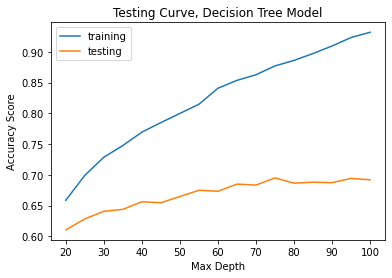

In [53]:
#checking the optimal max_depth value that gives the best performance on the testing set of the decision tree
plt.plot(depth_hyperparams, training_acc, label="training")
plt.plot(depth_hyperparams, testing_acc, label="testing")
plt.xlabel("Max Depth")
plt.ylabel("Accuracy Score")
plt.title("Testing Curve, Decision Tree Model")
plt.legend();

In [54]:
# Creating DecisionTreeClassifier and fit it to the training data
DTC = DecisionTreeClassifier(max_depth=95, random_state=42)
DTC.fit(X_train_counts, y_train)

DecisionTreeClassifier(max_depth=95, random_state=42)

In [55]:
# Use the classifier to make predictions on the testing data
y_pred = DTC.predict(X_test_counts)
y_pred

array([2, 5, 2, ..., 2, 2, 2], dtype=int64)

In [56]:
# confusion matrix for Decision Tree
confusion_matrix = pd.DataFrame(metrics.confusion_matrix(y_test,y_pred), index=['Arts & Culture','Business & Entrepreneurs','Pop Culture','Daily Life','Sports & Gaming','Science & Technology'], columns=['Arts & Culture','Business & Entrepreneurs','Pop Culture','Daily Life','Sports & Gaming','Science & Technology'])
confusion_matrix

,Arts & Culture,Business & Entrepreneurs,Pop Culture,Daily Life,Sports & Gaming,Science & Technology
Arts & Culture,3,1,7,7,7,0
Business & Entrepreneurs,1,21,17,10,8,3
Pop Culture,4,2,413,24,40,14
Daily Life,2,7,65,84,20,1
Sports & Gaming,0,3,89,22,351,3
Science & Technology,0,2,22,6,7,23


In [57]:
# making prediction based on the pipeline and classification set
new_twitter = ['data science is really a great course']
new_twitter_vector = vectorizer.transform(new_twitter)
prediction = DTC.predict(new_twitter_vector)
print('Prediction:', prediction)

Prediction: [5]


In [58]:
# Prediction
new_twitter = ['clinton lumberkings beat cedar rapids kernels game western division finals evan edwards hit run hr wp josh roberson ip h r bb k mwlplayoffs mwlscoreboard']
new_twitter_vector = vectorizer.transform(new_twitter)
prediction = DTC.predict(new_twitter_vector)
print('Prediction:', prediction)

Prediction: [4]


### Evaluation using Random Forest Classifer

In [59]:
# Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

In [60]:
#creating a pipeline and fitting it to the training data
model_RF = make_pipeline(
    CountVectorizer(stop_words='english'),
    RandomForestClassifier()
)

# Fitting the model into the training data
model_RF.fit(X_train, y_train)

Pipeline(steps=[('countvectorizer', CountVectorizer(stop_words='english')),
                ('randomforestclassifier', RandomForestClassifier())])

In [61]:
model_RF.score(X_test,y_test) #checking accuracy of model of test data

0.7587276958882855

In [62]:
# confusion matrix for random forest classifer
confusion_matrix = pd.DataFrame(metrics.confusion_matrix(y_test,y_pred), index=['Arts & Culture','Business & Entrepreneurs','Pop Culture','Daily Life','Sports & Gaming','Science & Technology'], columns=['Arts & Culture','Business & Entrepreneurs','Pop Culture','Daily Life','Sports & Gaming','Science & Technology'])
confusion_matrix

,Arts & Culture,Business & Entrepreneurs,Pop Culture,Daily Life,Sports & Gaming,Science & Technology
Arts & Culture,3,1,7,7,7,0
Business & Entrepreneurs,1,21,17,10,8,3
Pop Culture,4,2,413,24,40,14
Daily Life,2,7,65,84,20,1
Sports & Gaming,0,3,89,22,351,3
Science & Technology,0,2,22,6,7,23


### Evaluation Using K-Nearest Neighbor Classifier 

In [63]:
# Creating and training the k-NN classifier
k = 5
knn_classifier = KNeighborsClassifier(n_neighbors=k)

In [64]:
#creating a pipeline and fitting it to the training data
model_KNN = make_pipeline(
    CountVectorizer(stop_words='english'),
    KNeighborsClassifier(n_neighbors=k)
)

# Fitting the model to training data
model_KNN.fit(X_train, y_train)

Pipeline(steps=[('countvectorizer', CountVectorizer(stop_words='english')),
                ('kneighborsclassifier', KNeighborsClassifier())])

In [65]:
model_KNN.score(X_test,y_test) #model accuracy

0.5942591155934833

In [66]:
# confusion matrix for k-nearest neighbor
confusion_matrix = pd.DataFrame(metrics.confusion_matrix(y_test,y_pred), index=['Arts & Culture','Business & Entrepreneurs','Pop Culture','Daily Life','Sports & Gaming','Science & Technology'], columns=['Arts & Culture','Business & Entrepreneurs','Pop Culture','Daily Life','Sports & Gaming','Science & Technology'])
confusion_matrix

,Arts & Culture,Business & Entrepreneurs,Pop Culture,Daily Life,Sports & Gaming,Science & Technology
Arts & Culture,3,1,7,7,7,0
Business & Entrepreneurs,1,21,17,10,8,3
Pop Culture,4,2,413,24,40,14
Daily Life,2,7,65,84,20,1
Sports & Gaming,0,3,89,22,351,3
Science & Technology,0,2,22,6,7,23


### Feature Extraction Using TFIDF

In [67]:
# TfidfVectorizer instance 
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(df['text']) # Fitting the vectorizer into the text data and transforming it into a term-document matrix
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=vectorizer.get_feature_names()) # DataFrame with the TF-IDF vectors, feature_names= words
tfidf_df

c:\Users\hp\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,aa,aaa,aaaaa,aaaaaaaa,aaaand,aaand,aadar,aafp,aag,aahana,...,zombiesurvivalmode,zone,zoom,zosano,zoth,zulka,zunino,zurana,zurawik,zviri
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6438,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6439,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6440,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6441,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [68]:
# Fitting the vectorizer to the training data and transform the training and testing data into TF-IDF feature vectors
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

### Evaluation Using Logistic Regression Classifier

In [69]:
# Initialize the logistic regression classifier
model_LRT = LogisticRegression(random_state=42)
model_LRT.fit(X_train_tfidf, y_train) # Train the classifier on the training data
y_pred = model_LRT.predict(X_test_tfidf) # Make predictions on the testing data
y_pred

array([2, 5, 2, ..., 4, 2, 4], dtype=int64)

In [70]:
accuracy = accuracy_score(y_test, y_pred) # model accuracy
accuracy 

0.7851047323506595

In [71]:
#creating a pipeline and fitting it to the training data
model_LRT = make_pipeline(
    TfidfVectorizer(),
    LogisticRegression(max_iter=1000)
)

# Fit model to training data
model_LRT.fit(X_train, y_train)

Pipeline(steps=[('tfidfvectorizer', TfidfVectorizer()),
                ('logisticregression', LogisticRegression(max_iter=1000))])

In [72]:
model_LRT.score(X_test,y_test) # model accuracy

0.7851047323506595

In [73]:
# confusion martix for logistic regression
confusion_matrix = pd.DataFrame(metrics.confusion_matrix(y_test,y_pred), index=['Arts & Culture','Business & Entrepreneurs','Pop Culture','Daily Life','Sports & Gaming','Science & Technology'], columns=['Arts & Culture','Business & Entrepreneurs','Pop Culture','Daily Life','Sports & Gaming','Science & Technology'])
confusion_matrix

,Arts & Culture,Business & Entrepreneurs,Pop Culture,Daily Life,Sports & Gaming,Science & Technology
Arts & Culture,1,0,16,3,5,0
Business & Entrepreneurs,0,10,21,7,21,1
Pop Culture,0,0,455,12,26,4
Daily Life,0,0,57,92,30,0
Sports & Gaming,0,0,27,3,437,1
Science & Technology,1,0,25,6,11,17


### Evaluation Using Naive Bayes Classifier

In [74]:
# creating a pipeline and fitting it to the training data
model_NBT = make_pipeline(
    TfidfVectorizer(),
    MultinomialNB()
)

# Fit model to training data
model_NBT.fit(X_train, y_train)

Pipeline(steps=[('tfidfvectorizer', TfidfVectorizer()),
                ('multinomialnb', MultinomialNB())])

In [75]:
model_NBT.score(X_test,y_test) # model accuracy

0.7199379363847944

In [76]:
# confusion matrix for naive bayes
confusion_matrix = pd.DataFrame(metrics.confusion_matrix(y_test,y_pred), index=['Arts & Culture','Business & Entrepreneurs','Pop Culture','Daily Life','Sports & Gaming','Science & Technology'], columns=['Arts & Culture','Business & Entrepreneurs','Pop Culture','Daily Life','Sports & Gaming','Science & Technology'])
confusion_matrix

,Arts & Culture,Business & Entrepreneurs,Pop Culture,Daily Life,Sports & Gaming,Science & Technology
Arts & Culture,1,0,16,3,5,0
Business & Entrepreneurs,0,10,21,7,21,1
Pop Culture,0,0,455,12,26,4
Daily Life,0,0,57,92,30,0
Sports & Gaming,0,0,27,3,437,1
Science & Technology,1,0,25,6,11,17


### Evaluation Using Decision Tree Classifier

In [77]:
# creating a pipeline and fitting it to the training data
model_DTT = make_pipeline(
     TfidfVectorizer(),
    DecisionTreeClassifier(max_depth=100)
)

# Fit model to training data
model_DTT.fit(X_train, y_train)

Pipeline(steps=[('tfidfvectorizer', TfidfVectorizer()),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(max_depth=100))])

In [78]:
model_DTT.score(X_test,y_test)  #model accuracy

0.6757176105508146

In [79]:
# confusion matrix for decision tree
confusion_matrix = pd.DataFrame(metrics.confusion_matrix(y_test,y_pred), index=['Arts & Culture','Business & Entrepreneurs','Pop Culture','Daily Life','Sports & Gaming','Science & Technology'], columns=['Arts & Culture','Business & Entrepreneurs','Pop Culture','Daily Life','Sports & Gaming','Science & Technology'])
confusion_matrix

,Arts & Culture,Business & Entrepreneurs,Pop Culture,Daily Life,Sports & Gaming,Science & Technology
Arts & Culture,1,0,16,3,5,0
Business & Entrepreneurs,0,10,21,7,21,1
Pop Culture,0,0,455,12,26,4
Daily Life,0,0,57,92,30,0
Sports & Gaming,0,0,27,3,437,1
Science & Technology,1,0,25,6,11,17


### Evaluation Using Random Forest Classifer

In [80]:
# Initialize the Random Forest Classifier
model_RFT = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier on the training data
model_RFT.fit(X_train_tfidf, y_train)

# Make predictions on the testing data
y_pred = model_RFT.predict(X_test_tfidf)

In [81]:
y_pred

array([2, 5, 2, ..., 2, 2, 4], dtype=int64)

In [82]:
accuracy = accuracy_score(y_test, y_pred) # model accuracy
accuracy

0.7587276958882855

In [83]:
# creating a pipeline and fitting it to the training data
model_RFT = make_pipeline(
    TfidfVectorizer(),
    RandomForestClassifier(n_estimators=100, random_state=42)
)

# Fit model to training data
model_RFT.fit(X_train, y_train)

Pipeline(steps=[('tfidfvectorizer', TfidfVectorizer()),
                ('randomforestclassifier',
                 RandomForestClassifier(random_state=42))])

In [84]:
model_RFT.score(X_test,y_test)  # model accuracy

0.7587276958882855

In [85]:
# confusion matrix for random forest
confusion_matrix = pd.DataFrame(metrics.confusion_matrix(y_test,y_pred), index=['Arts & Culture','Business & Entrepreneurs','Pop Culture','Daily Life','Sports & Gaming','Science & Technology'], columns=['Arts & Culture','Business & Entrepreneurs','Pop Culture','Daily Life','Sports & Gaming','Science & Technology'])
confusion_matrix

,Arts & Culture,Business & Entrepreneurs,Pop Culture,Daily Life,Sports & Gaming,Science & Technology
Arts & Culture,2,0,14,4,5,0
Business & Entrepreneurs,0,14,26,6,12,2
Pop Culture,0,0,449,12,31,5
Daily Life,0,1,75,82,21,0
Sports & Gaming,0,0,53,3,412,0
Science & Technology,1,0,31,0,9,19


### Evaluation Using K-Nearest Neighbor Classifier

In [86]:
# Creating and training the k-NN classifier
k = 5
knn_classifier = KNeighborsClassifier(n_neighbors=k)

In [87]:
# creating a pipeline and fitting it to the training data
model_KNNT = make_pipeline(
    TfidfVectorizer(),
    KNeighborsClassifier(n_neighbors=k)
)

# Fit model to training data
model_KNNT.fit(X_train, y_train)

Pipeline(steps=[('tfidfvectorizer', TfidfVectorizer()),
                ('kneighborsclassifier', KNeighborsClassifier())])

In [88]:
model_KNNT.score(X_test,y_test) #model accuracy

0.7354538401861909

In [89]:
# confusion matrix on k nearest neighbor
confusion_matrix = pd.DataFrame(metrics.confusion_matrix(y_test,y_pred), index=['Arts & Culture','Business & Entrepreneurs','Pop Culture','Daily Life','Sports & Gaming','Science & Technology'], columns=['Arts & Culture','Business & Entrepreneurs','Pop Culture','Daily Life','Sports & Gaming','Science & Technology'])
confusion_matrix

,Arts & Culture,Business & Entrepreneurs,Pop Culture,Daily Life,Sports & Gaming,Science & Technology
Arts & Culture,2,0,14,4,5,0
Business & Entrepreneurs,0,14,26,6,12,2
Pop Culture,0,0,449,12,31,5
Daily Life,0,1,75,82,21,0
Sports & Gaming,0,0,53,3,412,0
Science & Technology,1,0,31,0,9,19


In [90]:
# Initialize the models

models = [model_lr, model_NB, model_DTC, model_KNN, model_RF,model_LRT,model_NBT,model_DTT,model_RFT,model_KNNT]

# Train each model and keep track of their scores
best_score = 0
best_model = None

for model in models:
    score = model.score(X_test,y_test)

    if score > best_score:
        best_score = score
        best_model = model

In [91]:
best_model

Pipeline(steps=[('countvectorizer', CountVectorizer(stop_words='english')),
                ('logisticregression', LogisticRegression(max_iter=1000))])

In [93]:
# saving the best model
with open('best_model.pkl', 'wb') as f:
    pickle.dump(best_model, f)